### Ejercicios del tema de Clasificación

*Hugo Díaz Díaz* (*hdiazd00@estudiantes.unileon.es*)

*Correo profesional: hugo.didi.contacto@gmail.com*

---

> 
> En este cuaderno encontrarás:
>- La construcción de un **clasificador para el dataset MNIST** con exactitud igual o superior al 97%.
>- La realización de **Data Augmentation** sobre este conjunto de datos.
>- ***(OPCIONAL)*** La creación de un modelo de predicción de supervivencia sobre el dataset del *Titanic*.
> 

---


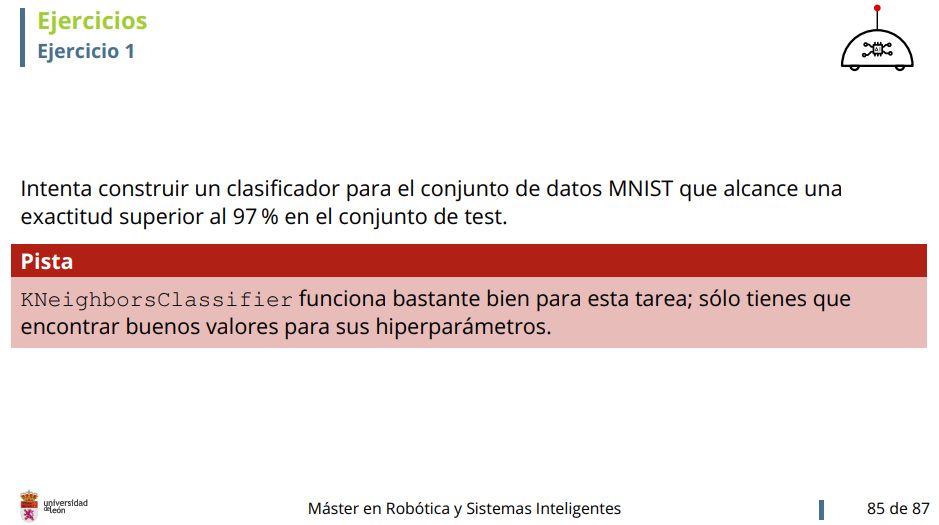

### 1.1. Configuración inical y carga del dataset
Podemos empezar con el bloque inicial, tal como explica el profesor, verificando las versiones de Python y Scikit. Después, cargando las librerías comunes y configurando el guardado de gráficos.

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Is this notebook running on Colab or Kaggle?
IS_COLAB = "google.colab" in sys.modules
IS_KAGGLE = "kaggle_secrets" in sys.modules

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Ahora, cargamos el dataset de trabajo MNIST.

In [4]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist["data"], mnist["target"]
y = y.astype(np.uint8)

### 1.2. Preparación de los datos.
Se decide normalizar para que la presencia de pixeles negros o muy altos (valores cercanos a 255), no presenten excesiva influencia en el cálculo de distancias del KNN.

In [5]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

X_train = X_train.astype(np.float32)/ 255.0
X_test = X_test.astype(np.float32)/ 255.0

### 1.3. Entrenamiento del modelo (KNN) y test

In [8]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=4, weights='distance', p=2) #distancia euclídea
knn_clf.fit(X_train, y_train)

,n_neighbors,4
,weights,'distance'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


Ahora extraemos el `cross_val_score()`

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score


skfolds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
cross_val_score(knn_clf, X_train, y_train, cv=skfolds, scoring="accuracy")

array([0.9738, 0.9727, 0.9706])

De esta manera, se ha logrado superar el **97% de accuracy**. Se decidió usar 4 vecinos ya que el resultado de accuracy era ligeramente más estable.

Por jugar un poco, hagamos una herramienta de rapida de test de imágenes. Esta herramienta elige un *datapoint* reservado para test aleatorio, muestra la imagen, e imprime el valor esperado y predicho por el modelo.

Saving figure some_digit_plot


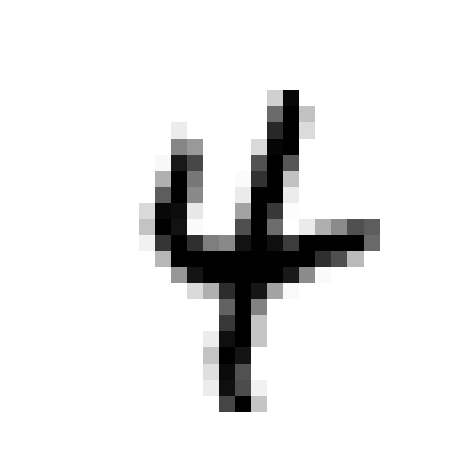

Valor esperado: 4 	Valor predicho: [4]


In [30]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

i = np.random.randint(len(X_test))
some_digit = X_test[i]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")

save_fig("some_digit_plot")
plt.show()
print("Valor esperado:", y_test[i], "\tValor predicho:", knn_clf.predict([some_digit]))